Random Forest Accuracy: 0.723961297666477

Classification Report:
               precision    recall  f1-score   support

       Clear       0.72      0.76      0.74       665
      Cloudy       0.71      0.74      0.73       772
    Fog/Haze       0.79      0.70      0.74        37
        Rain       0.74      0.56      0.63       178
        Snow       0.79      0.67      0.72       105

    accuracy                           0.72      1757
   macro avg       0.75      0.69      0.71      1757
weighted avg       0.73      0.72      0.72      1757


Confusion Matrix:
 [[506 156   2   1   0]
 [177 571   1  16   7]
 [  0   0  26  11   0]
 [ 10  54   3  99  12]
 [  5  22   1   7  70]]

Before Outlier Handling:
Temp_C: Skew =-0.18, Kurt=-0.92


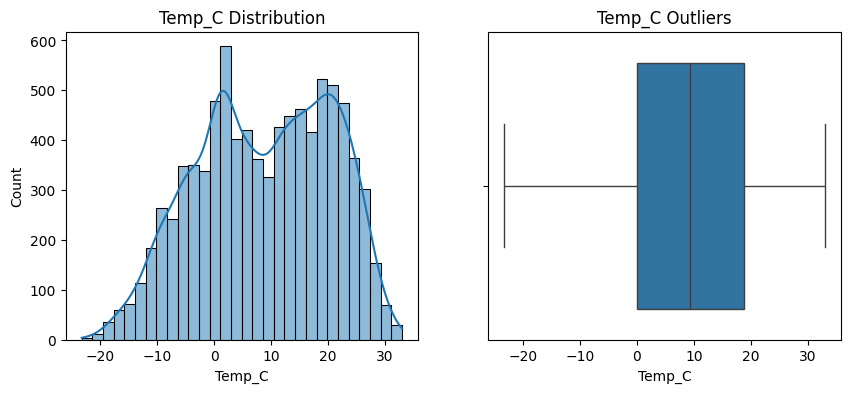

Dew Point Temp_C: Skew =-0.32, Kurt=-0.82


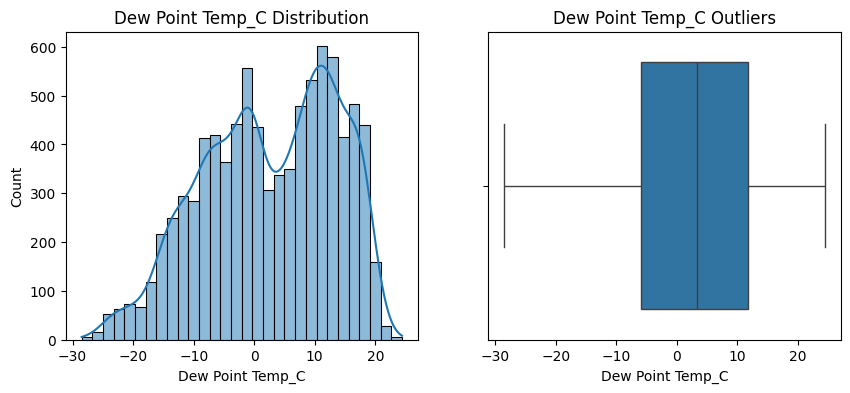

Rel Hum_%: Skew =-0.32, Kurt=-0.55


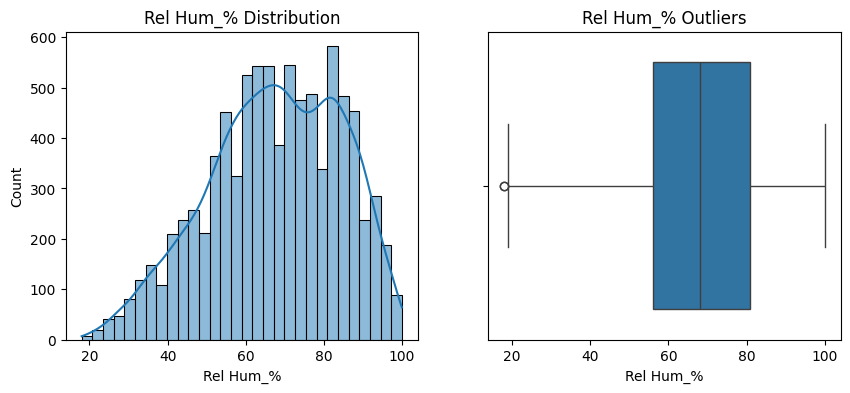

Wind Speed_km/h: Skew =0.87, Kurt=1.54


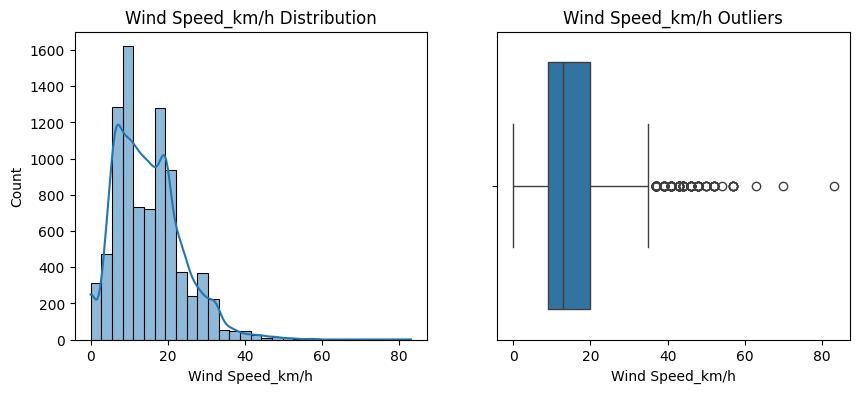

Visibility_km: Skew =0.41, Kurt=-0.35


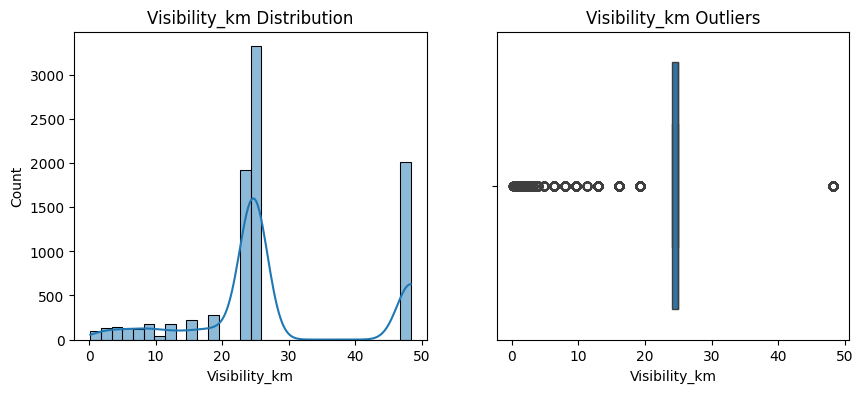

Press_kPa: Skew =-0.23, Kurt=0.71


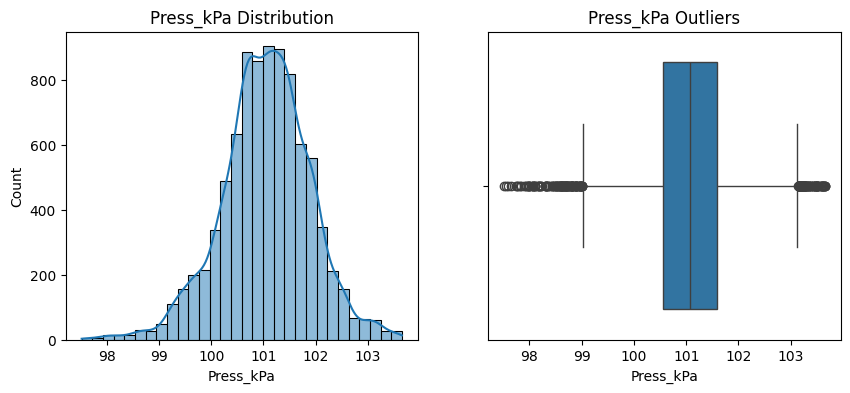

Number of outliers in 'Temp_C': 0
Number of outliers in 'Dew Point Temp_C': 0
Number of outliers in 'Rel Hum_%': 0
Number of outliers in 'Wind Speed_km/h': 0
Number of outliers in 'Visibility_km': 0
Number of outliers in 'Press_kPa': 0

After Outlier Handling:
Temp_C: Skew =-0.18, Kurt=-0.92


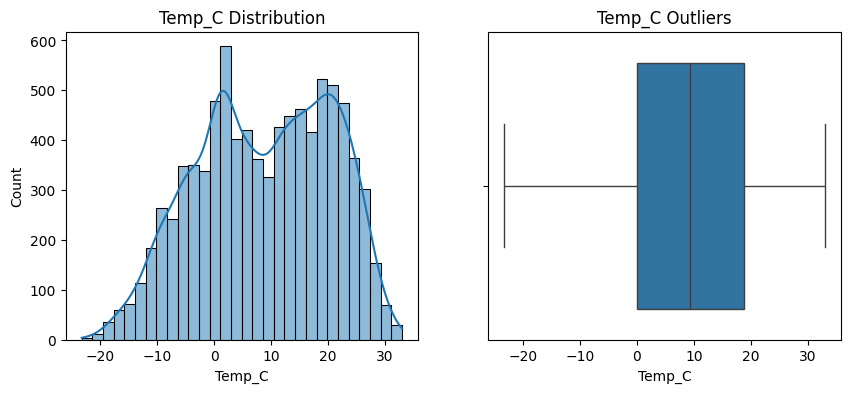

Dew Point Temp_C: Skew =-0.32, Kurt=-0.82


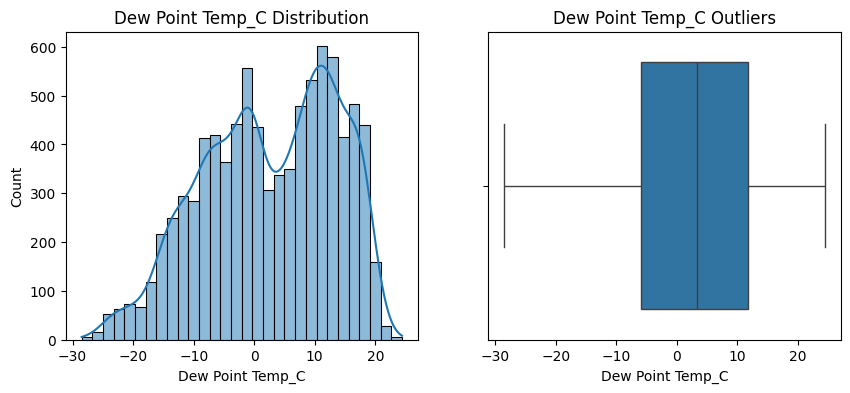

Rel Hum_%: Skew =-0.32, Kurt=-0.55


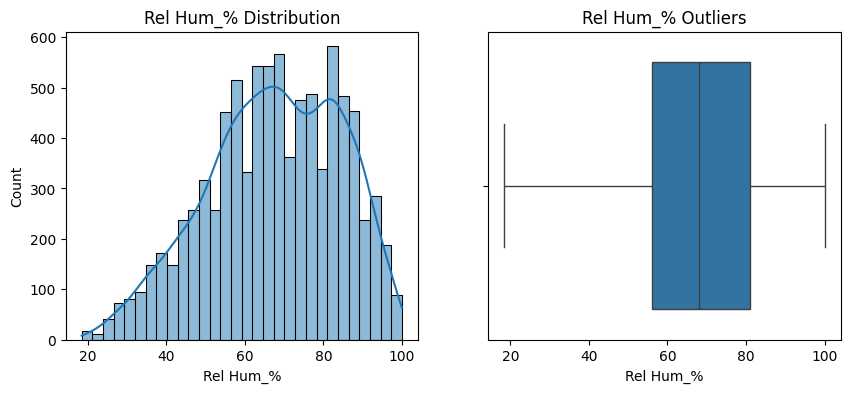

Wind Speed_km/h: Skew =0.53, Kurt=-0.19


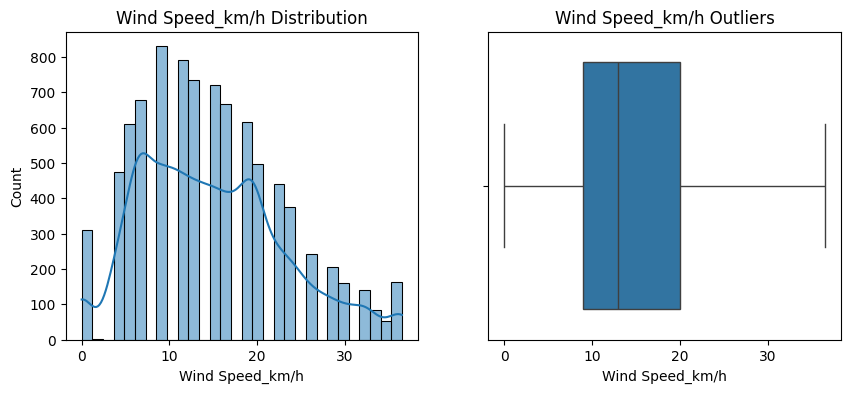

Visibility_km: Skew =-0.23, Kurt=-0.81


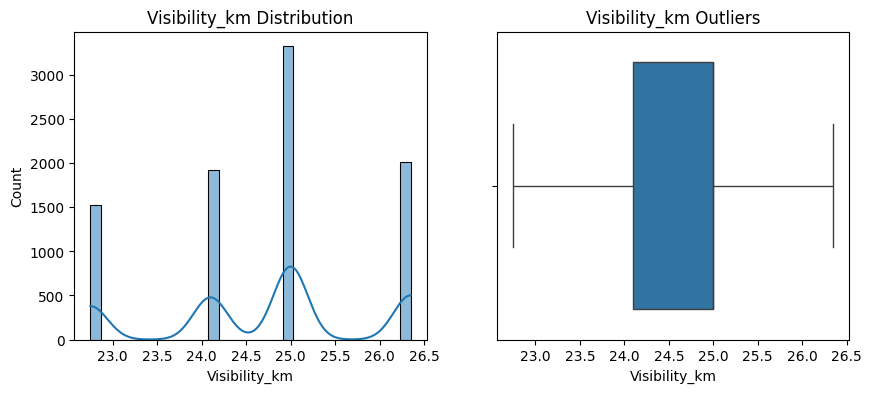

Press_kPa: Skew =-0.10, Kurt=0.06


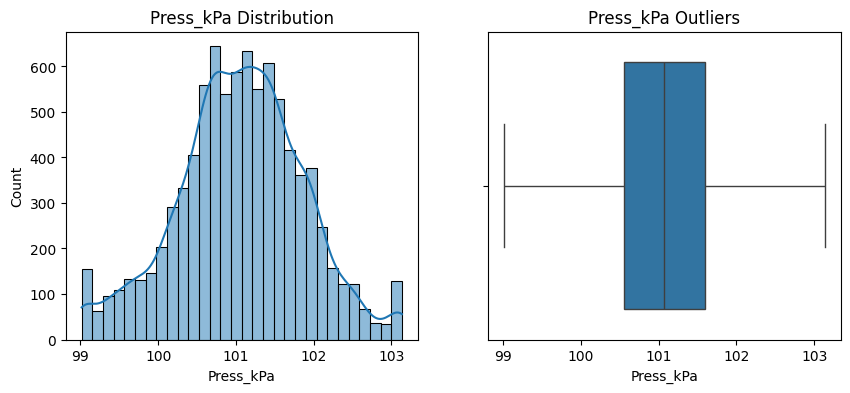


KNN Accuracy: 0.6050085372794536

KNN Classification Report:
               precision    recall  f1-score   support

       Clear       0.58      0.65      0.61       665
      Cloudy       0.61      0.62      0.61       772
    Fog/Haze       0.66      0.57      0.61        37
        Rain       0.63      0.46      0.53       178
        Snow       0.75      0.52      0.62       105

    accuracy                           0.61      1757
   macro avg       0.65      0.56      0.60      1757
weighted avg       0.61      0.61      0.60      1757


KNN Confusion Matrix:
 [[429 232   1   3   0]
 [273 477   1  15   6]
 [  0   0  21  16   0]
 [ 23  55   7  81  12]
 [ 12  23   2  13  55]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/Project 1 - Weather Dataset.csv')

# Map weather into 5 categories
def map_weather(cond):
    cond = cond.lower()
    if "clear" in cond: return "Clear"
    if "cloud" in cond or "overcast" in cond: return "Cloudy"
    if any(x in cond for x in ["rain","drizzle","shower","thunderstorm"]):
        return "Rain"
    if "snow" in cond: return "Snow"
    return "Fog/Haze"
df = dataset.copy()
df["Weather_Category"] = df["Weather"].apply(map_weather)

# Features and Target
X = df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']]
y = df["Weather_Category"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


from scipy.stats import skew, kurtosis

# Map weather into 5 categories
def analyze_distribution(data, cols):
    for col in cols:
        print(f"{col}: Skew ={skew(data[col]):.2f}, Kurt={kurtosis(data[col]):.2f}")
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1); sns.histplot(data[col], kde=True, bins=30);
        plt.title(f"{col} Distribution")
        plt.subplot(1,2,2); sns.boxplot(x=data[col]);
        plt.title(f"{col} Outliers")
        plt.show()

# Before outlier handling
print("\nBefore Outlier Handling:")
analyze_distribution(dataset, X.columns)

# Select all numeric columns
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Cap values at IQR bounds for each column
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping (ensures no outliers remain)
    dataset[col] = dataset[col].clip(lower=lower_bound, upper=upper_bound)

# Re-check outlier counts (should all be 0)
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = dataset[(dataset[col] < lower_bound) |
    (dataset[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}': {outliers_count}")


# Outlier handling for all numeric cols (median replacement)
for col in X.columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = dataset[col].median()
    dataset.loc[(dataset[col] < lower_bound) |
    (dataset[col] > upper_bound), col] = median_val

#using  distance base algortithm and import KNN
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5) # you can tune n_neighbors
knn.fit(X_train, y_train)

# Predict with KNN
y_pred_knn = knn.predict(X_test)

# Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))